Łączna liczba zdjęć w zbiorze treningowym: 4410
Łączna liczba zdjęć w zbiorze testowym: 185
Łączna liczba zdjęć w zbiorze walidacyjnym: 185


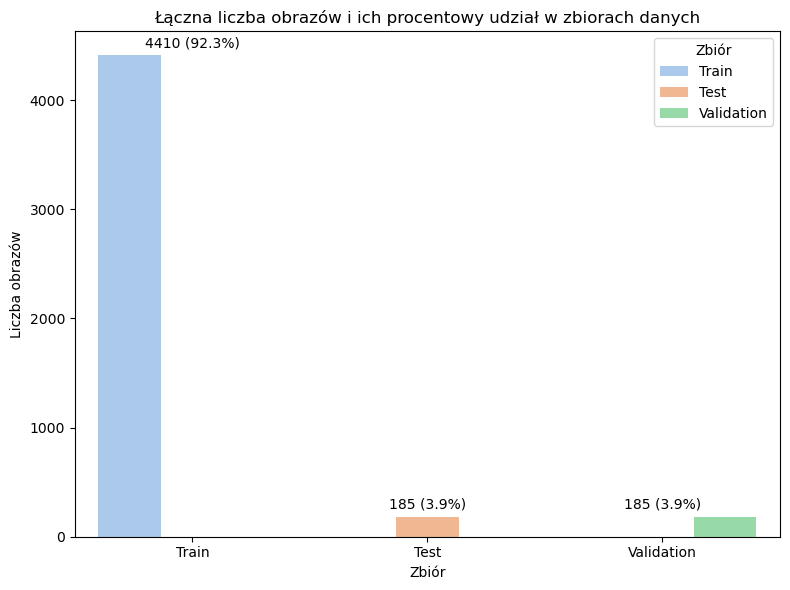

In [5]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import glob
#
#Sprawdzam czy ramka danych nie uległa zmianie
data_path = 'DATA\\'

# Stworzenie listy dla zbiorów Train, Test, Valid
train_path = os.path.join(data_path, 'Rotated', 'Train')
test_path = os.path.join(data_path, 'Rotated', 'test')
valid_path = os.path.join(data_path, 'Rotated', 'valid')

# Lista klas (typów meduz)
classes = ['barrel_jellyfish', 'blue_jellyfish', 'compass_jellyfish', 
           'lions_mane_jellyfish', 'mauve_stinger_jellyfish', 'Moon_jellyfish']

# Przygotowanie listy plików dla każdej klasy i zbioru (Train, Test, Valid)
train_files = {cls: glob.glob(os.path.join(train_path, cls, '*.jpg')) for cls in classes}
test_files = {cls: glob.glob(os.path.join(test_path, cls, '*.jpg')) for cls in classes}
valid_files = {cls: glob.glob(os.path.join(valid_path, cls, '*.jpg')) for cls in classes}

def total_images_in_dataset(files_dict):
    return sum(len(paths) for paths in files_dict.values())

train_total = total_images_in_dataset(train_files)
test_total = total_images_in_dataset(test_files)
valid_total = total_images_in_dataset(valid_files)
total_all = train_total + test_total + valid_total

print("Łączna liczba zdjęć w zbiorze treningowym:", train_total)
print("Łączna liczba zdjęć w zbiorze testowym:", test_total)
print("Łączna liczba zdjęć w zbiorze walidacyjnym:", valid_total)

total_all = train_total + test_total + valid_total

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame({
    'Zbiór': ['Train', 'Test', 'Validation'],
    'Liczba obrazów': [train_total, test_total, valid_total],
})

df['% całości'] = df['Liczba obrazów'] / total_all * 100

plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Zbiór', y='Liczba obrazów', hue='Zbiór', palette='pastel')

for i, row in df.iterrows():
    plt.text(i, row['Liczba obrazów'] + total_all * 0.01, 
             f"{row['Liczba obrazów']} ({row['% całości']:.1f}%)", 
             ha='center', va='bottom', fontsize=10)

plt.title('Łączna liczba obrazów i ich procentowy udział w zbiorach danych')
plt.tight_layout()
plt.show()


In [6]:
import os
import glob
import random
import shutil

source_root = 'DATA\\Rotated'
target_root = 'DATA\\Rotated_Klasteryzacja'

classes = ['barrel_jellyfish', 'blue_jellyfish', 'compass_jellyfish',
           'lions_mane_jellyfish', 'mauve_stinger_jellyfish', 'Moon_jellyfish']

splits = ['Train', 'valid', 'test']

# Tworzenie folderów docelowych
for split in splits:
    for cls in classes:
        os.makedirs(os.path.join(target_root, split, cls), exist_ok=True)

# Przetwarzanie klas
for cls in classes:
    # Pobierz wszystkie obrazy z Train, valid i test
    all_files = []
    for split in splits:
        all_files += glob.glob(os.path.join(source_root, split, cls, '*.jpg'))

    random.shuffle(all_files)

    # Oblicz nowy podział 80/10/10
    total = len(all_files)
    n_train = int(0.8 * total)
    n_valid = int(0.1 * total)
    n_test = total - n_train - n_valid

    train_files = all_files[:n_train]
    valid_files = all_files[n_train:n_train + n_valid]
    test_files = all_files[n_train + n_valid:]

    # Kopiowanie plików do nowego katalogu
    def copy_files(file_list, split_name):
        for file in file_list:
            filename = os.path.basename(file)
            dest = os.path.join(target_root, split_name, cls, filename)
            shutil.copy2(file, dest)

    copy_files(train_files, 'Train')
    copy_files(valid_files, 'valid')
    copy_files(test_files, 'test')

print("✅ Nowy podział zapisany w 'Rotated_Klasteryzacja' (80%/10%/10%). Oryginalne dane pozostają nietknięte.")




✅ Nowy podział zapisany w 'Rotated_Klasteryzacja' (80%/10%/10%). Oryginalne dane pozostają nietknięte.


Łączna liczba zdjęć w zbiorze treningowym: 3824
Łączna liczba zdjęć w zbiorze testowym: 479
Łączna liczba zdjęć w zbiorze walidacyjnym: 477


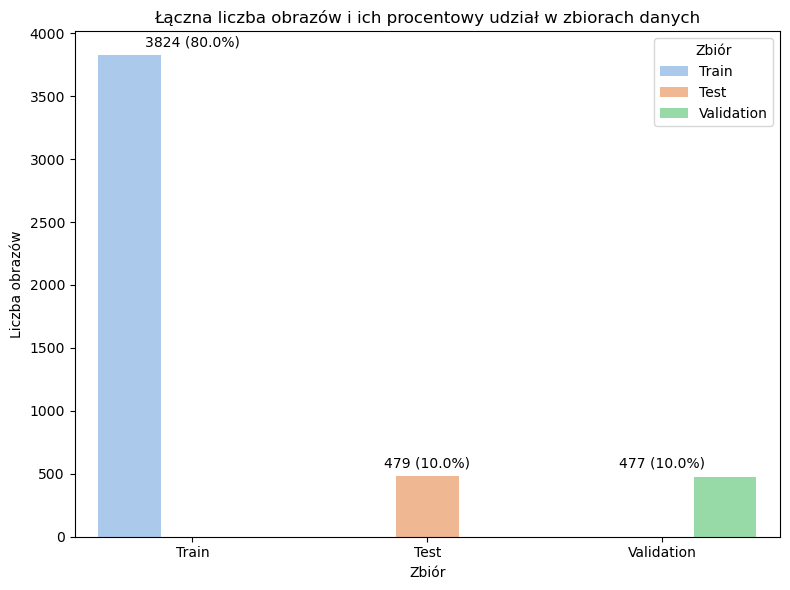

In [7]:

#Sprawdzam czy ramka danych nie uległa zmianie
data_path = 'DATA\\'

# Stworzenie listy dla zbiorów Train, Test, Valid
train_path = os.path.join(data_path, 'Rotated_Klasteryzacja', 'Train')
test_path = os.path.join(data_path, 'Rotated_Klasteryzacja', 'test')
valid_path = os.path.join(data_path, 'Rotated_Klasteryzacja', 'valid')


# Lista klas (typów meduz)
classes = ['barrel_jellyfish', 'blue_jellyfish', 'compass_jellyfish', 
           'lions_mane_jellyfish', 'mauve_stinger_jellyfish', 'Moon_jellyfish']

# Przygotowanie listy plików dla każdej klasy i zbioru (Train, Test, Valid)
train_files = {cls: glob.glob(os.path.join(train_path, cls, '*.jpg')) for cls in classes}
test_files = {cls: glob.glob(os.path.join(test_path, cls, '*.jpg')) for cls in classes}
valid_files = {cls: glob.glob(os.path.join(valid_path, cls, '*.jpg')) for cls in classes}

def total_images_in_dataset(files_dict):
    return sum(len(paths) for paths in files_dict.values())

train_total = total_images_in_dataset(train_files)
test_total = total_images_in_dataset(test_files)
valid_total = total_images_in_dataset(valid_files)
total_all = train_total + test_total + valid_total

print("Łączna liczba zdjęć w zbiorze treningowym:", train_total)
print("Łączna liczba zdjęć w zbiorze testowym:", test_total)
print("Łączna liczba zdjęć w zbiorze walidacyjnym:", valid_total)

total_all = train_total + test_total + valid_total

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame({
    'Zbiór': ['Train', 'Test', 'Validation'],
    'Liczba obrazów': [train_total, test_total, valid_total],
})

df['% całości'] = df['Liczba obrazów'] / total_all * 100

plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Zbiór', y='Liczba obrazów', hue='Zbiór', palette='pastel')

for i, row in df.iterrows():
    plt.text(i, row['Liczba obrazów'] + total_all * 0.01, 
             f"{row['Liczba obrazów']} ({row['% całości']:.1f}%)", 
             ha='center', va='bottom', fontsize=10)

plt.title('Łączna liczba obrazów i ich procentowy udział w zbiorach danych')
plt.tight_layout()
plt.show()

In [7]:
# Funkcja do wczytania i przetworzenia danych z CSV
def load_and_preprocess_csv(file_path):
    try:
        # Wczytanie pliku CSV
        data = pd.read_csv(file_path)
        # Wybór tylko kolumn numerycznych
        X = data.select_dtypes(include=[np.number])
        if X.empty:
            raise ValueError("Plik CSV nie zawiera kolumn numerycznych!")
        if X.shape[1] < 2:
            raise ValueError("Dane muszą mieć co najmniej 2 wymiary do wizualizacji 2D!")
        print(f"Wczytano dane z {file_path}: {X.shape[0]} wierszy, {X.shape[1]} cech.")
        return X
    except Exception as e:
        print(f"Błąd podczas wczytywania danych: {e}")
        exit()

Silhouette Score:
Silhouette Score to metryka oceniająca jakość klastrowania, mierząc, jak dobrze punkty są przypisane do swoich klastrów w porównaniu do innych klastrów. Wartość Silhouette Score waha się od -1 do 1:

+1: Punkt jest dobrze przypisany do swojego klastra i daleko od innych.
0: Punkt jest blisko granicy między klastrami.
-1: Punkt może być źle przypisany (bliżej innego klastra).

Średni Silhouette Score dla wszystkich punktów daje ocenę dla danej liczby klastrów.
Testujemy różne k i wybieramy to, które daje najwyższy średni Silhouette Score.

Metoda łokciowa:
Dla różnych wartości k (liczby klastrów, np. od 2 do 10) trenujemy model K-means.
Obliczamy WCSS dla każdej wartości k.
Rysujemy wykres, gdzie na osi X mamy liczbę klastrów (k), a na osi Y – WCSS.
Szukamy punktu, w którym WCSS przestaje znacząco maleć – tzw. „łokieć” (punkt, gdzie dodanie kolejnych klastrów daje niewielką poprawę). Ten punkt wskazuje optymalną liczbę klastrów.

Wczytano dane z C:\Users\oliwi\OneDrive\Pulpit\ML_laboratorium\modele\train_pca100.csv: 3824 wierszy, 101 cech.
Silhouette Score dla 2 klastrów: 0.0007, WCSS: 380673.48
Silhouette Score dla 3 klastrów: -0.0004, WCSS: 378771.99
Silhouette Score dla 4 klastrów: -0.0094, WCSS: 375993.38
Silhouette Score dla 5 klastrów: -0.0127, WCSS: 373230.67
Silhouette Score dla 6 klastrów: -0.0230, WCSS: 370896.51
Silhouette Score dla 7 klastrów: -0.0197, WCSS: 369572.53
Silhouette Score dla 8 klastrów: -0.0129, WCSS: 367882.91
Silhouette Score dla 9 klastrów: -0.0224, WCSS: 366319.14
Silhouette Score dla 10 klastrów: -0.0292, WCSS: 364149.27


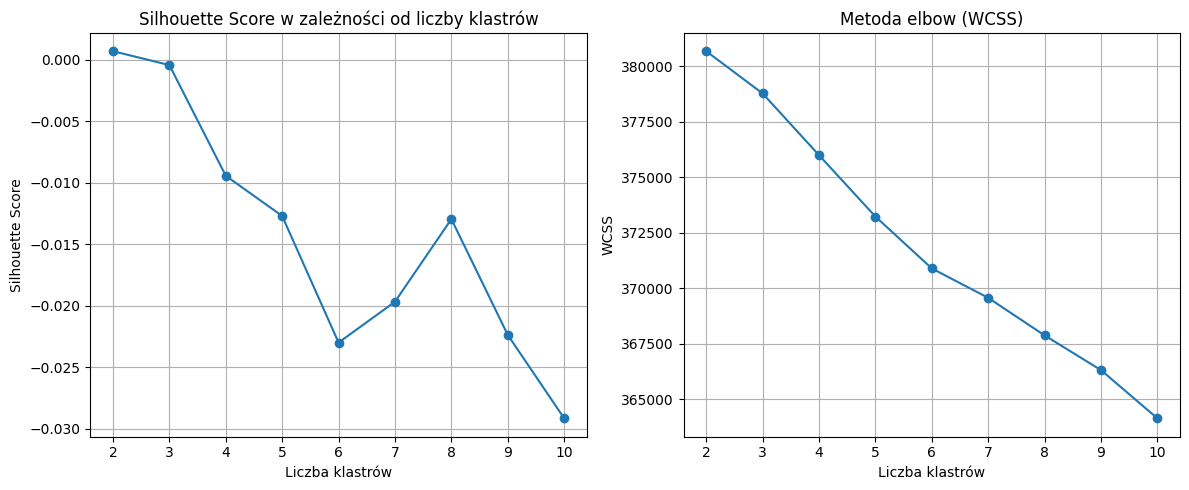

Optymalna liczba klastrów (na podstawie Silhouette Score): 2


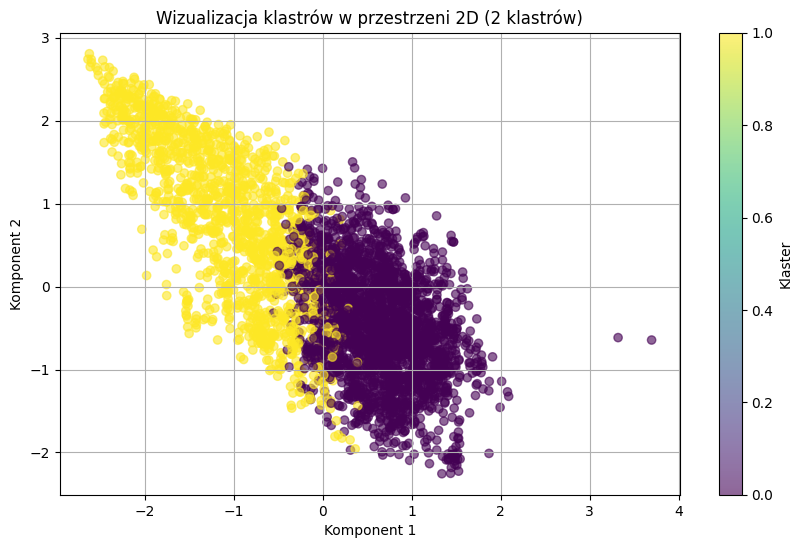

In [8]:
#K-Means i dostarajanie hiperparametrów - metoda Elbow i Silhouette0
#PCA100
import pandas as pd8
import numpy as np0
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Wczytanie danych treningowych z pliku CSV
file_path = 'C:\\Users\\oliwi\\OneDrive\\Pulpit\\ML_laboratorium\\modele\\train_pca100.csv'  # Zastąp nazwą swojego pliku CSV z danymi treningowymi
try:
    X = load_and_preprocess_csv(file_path)
except Exception as e:
    print(f"Błąd: {e}")
    exit()

# Normalizacja danych
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Funkcja do dostrajania liczby klastrów (Silhouette Score i Elbow)
def evaluate_kmeans(X, max_clusters=10):
    silhouette_scores = []
    wcss = []  # Within-Cluster Sum of Squares
    cluster_range = range(2, max_clusters + 1)
    
    for n_clusters in cluster_range:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = kmeans.fit_predict(X)
        # Silhouette Score
        silhouette_avg = silhouette_score(X, cluster_labels)
        silhouette_scores.append(silhouette_avg)
        # WCSS (metoda elbow)
        wcss.append(kmeans.inertia_)
        print(f"Silhouette Score dla {n_clusters} klastrów: {silhouette_avg:.4f}, WCSS: {wcss[-1]:.2f}")
    
    # Wizualizacja 1: Silhouette Score
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(cluster_range, silhouette_scores, marker='o')
    plt.title('Silhouette Score w zależności od liczby klastrów')
    plt.xlabel('Liczba klastrów')
    plt.ylabel('Silhouette Score')
    plt.grid(True)
    
    # Wizualizacja 2: Metoda elbow (WCSS)
    plt.subplot(1, 2, 2)
    plt.plot(cluster_range, wcss, marker='o')
    plt.title('Metoda elbow (WCSS)')
    plt.xlabel('Liczba klastrów')
    plt.ylabel('WCSS')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Zwracamy optymalną liczbę klastrów na podstawie Silhouette Score
    optimal_clusters = cluster_range[np.argmax(silhouette_scores)]
    return optimal_clusters

# Dostrajanie liczby klastrów na danych
optimal_n_clusters = evaluate_kmeans(X_scaled, max_clusters=10)
print(f"Optymalna liczba klastrów (na podstawie Silhouette Score): {optimal_n_clusters}")

# Trenowanie modelu K-Means z optymalną liczbą klastrów
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Wizualizacja: Rozkład klastrów w przestrzeni 2D
# Używamy pierwszych dwóch kolumn danych (zakładamy, że to główne komponenty PCA)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Klaster')
plt.title(f'Wizualizacja klastrów w przestrzeni 2D ({optimal_n_clusters} klastrów)')
plt.xlabel('Komponent 1')
plt.ylabel('Komponent 2')
plt.grid(True)
plt.show()




Wczytano dane z C:\Users\oliwi\OneDrive\Pulpit\ML_laboratorium\modele\train_pca10.csv: 3824 wierszy, 11 cech.
Silhouette Score dla 2 klastrów: 0.1167, WCSS: 36892.26
Silhouette Score dla 3 klastrów: 0.1138, WCSS: 34331.16
Silhouette Score dla 4 klastrów: 0.1150, WCSS: 32373.73
Silhouette Score dla 5 klastrów: 0.1343, WCSS: 30124.81
Silhouette Score dla 6 klastrów: 0.1403, WCSS: 28292.89
Silhouette Score dla 7 klastrów: 0.1355, WCSS: 27240.76
Silhouette Score dla 8 klastrów: 0.1491, WCSS: 25699.20
Silhouette Score dla 9 klastrów: 0.1509, WCSS: 24691.44
Silhouette Score dla 10 klastrów: 0.1475, WCSS: 23856.50


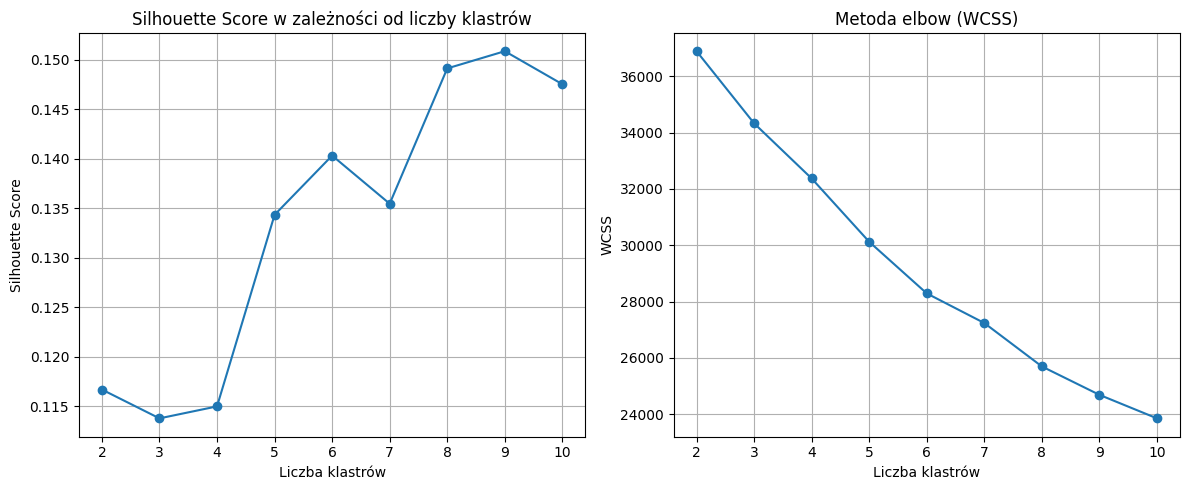

Optymalna liczba klastrów (na podstawie Silhouette Score): 9


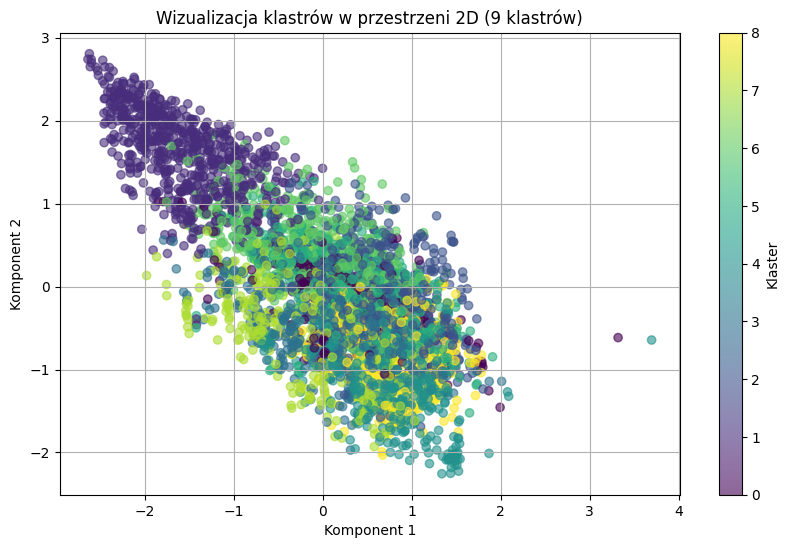

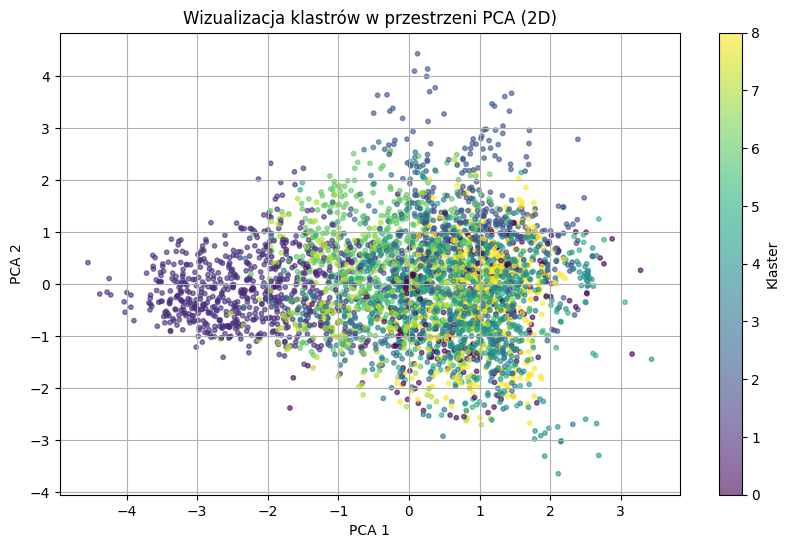

C:\Users\oliwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\oliwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


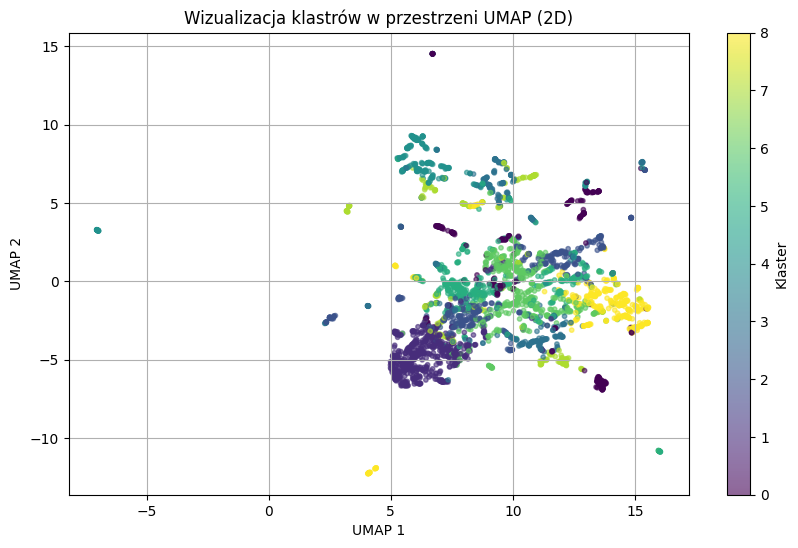

C:\Users\oliwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


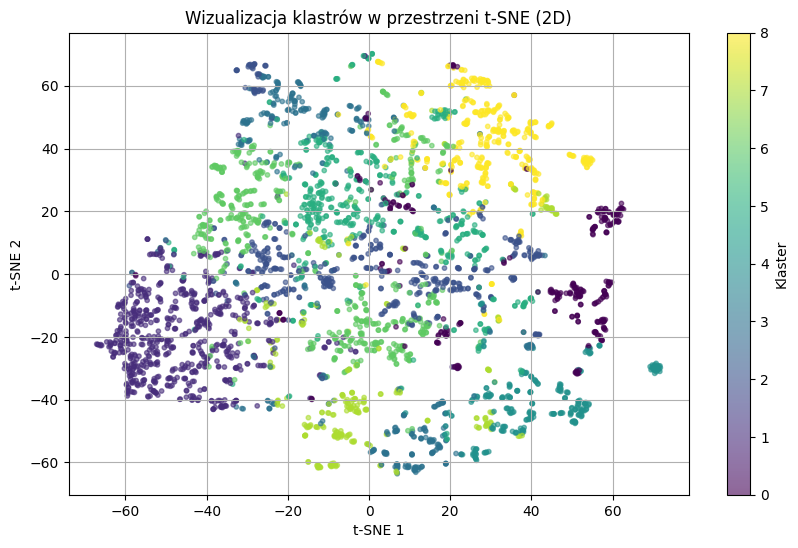

In [9]:
#K-Means i dostarajanie hiperparametrów - metoda Elbow i Silhouette0
#PCA10

# Wczytanie danych treningowych z pliku CSV
file_path = 'C:\\Users\\oliwi\\OneDrive\\Pulpit\\ML_laboratorium\\modele\\train_pca10.csv'  # Zastąp nazwą swojego pliku CSV z danymi treningowymi
try:
    X = load_and_preprocess_csv(file_path)
except Exception as e:
    print(f"Błąd: {e}")
    exit()

# Normalizacja danych
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

# Dostrajanie liczby klastrów na danych
optimal_n_clusters = evaluate_kmeans(X_scaled, max_clusters=10)
print(f"Optymalna liczba klastrów (na podstawie Silhouette Score): {optimal_n_clusters}")

# Trenowanie modelu K-Means z optymalną liczbą klastrów
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Wizualizacja: Rozkład klastrów w przestrzeni 2D
# Używamy pierwszych dwóch kolumn danych (zakładamy, że to główne komponenty PCA)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Klaster')
plt.title(f'Wizualizacja klastrów w przestrzeni 2D ({optimal_n_clusters} klastrów)')
plt.xlabel('Komponent 1')
plt.ylabel('Komponent 2')
plt.grid(True)
plt.show()

# --- PCA ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, s=10, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Klaster')
plt.title('Wizualizacja klastrów w przestrzeni PCA (2D)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()

# --- UMAP ---
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=labels, s=10, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Klaster')
plt.title('Wizualizacja klastrów w przestrzeni UMAP (2D)')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(True)
plt.show()

# --- t-SNE ---
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, s=10, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Klaster')
plt.title('Wizualizacja klastrów w przestrzeni t-SNE (2D)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.grid(True)
plt.show()

In [ ]:
#pip install scikit-learn-extra
import sklearn_extra0

PAM Cost (Partitioning Around Medoids Cost) to metryka używana w algorytmie K-Medoids do oceny jakości klastrowania. Jest odpowiednikiem WCSS (Within-Cluster Sum of Squares) w K-Means, ale dostosowanym do specyfiki K-Medoids, który zamiast średnich (centroidów) używa rzeczywistych punktów danych jako reprezentantów klastrów, zwanych medoidami.

Wczytano dane z C:\Users\oliwi\OneDrive\Pulpit\ML_laboratorium\modele\train_pca100.csv: 3824 wierszy, 101 cech.
Silhouette Score dla 2 klastrów: 0.0056, PAM Cost: 41032.96
Silhouette Score dla 3 klastrów: 0.0019, PAM Cost: 40703.35
Silhouette Score dla 4 klastrów: -0.0024, PAM Cost: 40457.75
Silhouette Score dla 5 klastrów: 0.0014, PAM Cost: 40268.02
Silhouette Score dla 6 klastrów: 0.0016, PAM Cost: 40099.70
Silhouette Score dla 7 klastrów: -0.0089, PAM Cost: 39971.66
Silhouette Score dla 8 klastrów: -0.0192, PAM Cost: 39847.95
Silhouette Score dla 9 klastrów: -0.0177, PAM Cost: 39732.84
Silhouette Score dla 10 klastrów: -0.0163, PAM Cost: 39620.68


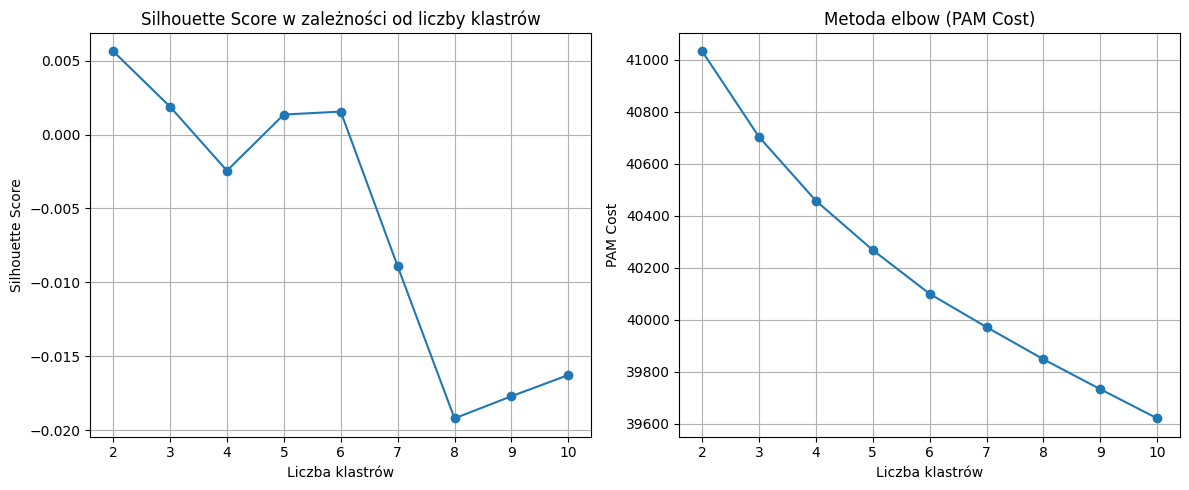

Optymalna liczba klastrów (na podstawie Silhouette Score): 2


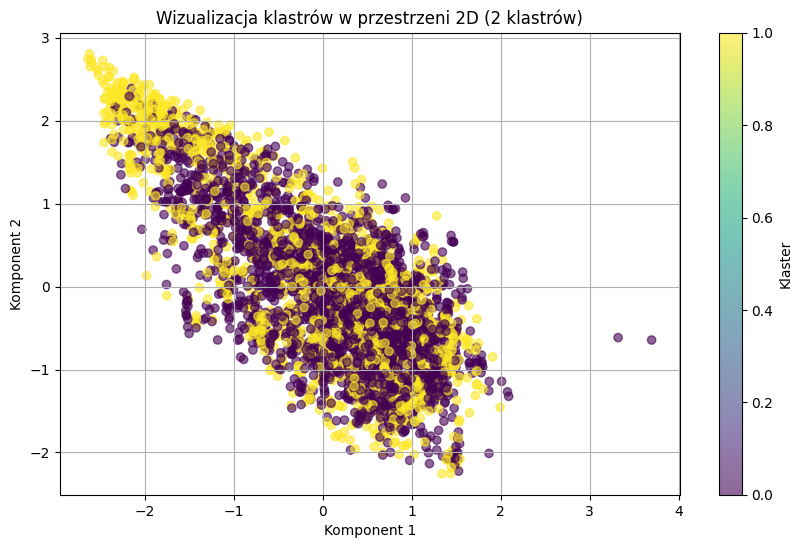

In [7]:
#K-Medoids i dostrajanie hiperparametrów - metoda Elbow i PAM Cost (elbow)
#PCA100
import numpy as np
import cv2
import os
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

file_path = 'C:\\Users\\oliwi\\OneDrive\\Pulpit\\ML_laboratorium\\modele\\train_pca100.csv'  # Zastąp nazwą swojego pliku CSV z danymi treningowymi
try:
    X = load_and_preprocess_csv(file_path)
except Exception as e:
    print(f"Błąd: {e}")
    exit()

# Normalizacja danych 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Funkcja do dostrajania liczby klastrów (Silhouette Score i PAM Cost)
def evaluate_kmedoids(X, max_clusters=10):
    silhouette_scores = []
    pam_costs = []  # Sum of distances to medoids (odpowiednik WCSS)
    cluster_range = range(2, max_clusters + 1)
    
    for n_clusters in cluster_range:
        kmedoids = KMedoids(n_clusters=n_clusters, random_state=42, method='pam')
        cluster_labels = kmedoids.fit_predict(X)
        # Silhouette Score
        silhouette_avg = silhouette_score(X, cluster_labels)
        silhouette_scores.append(silhouette_avg)
        # PAM Cost
        pam_costs.append(kmedoids.inertia_)
        print(f"Silhouette Score dla {n_clusters} klastrów: {silhouette_avg:.4f}, PAM Cost: {pam_costs[-1]:.2f}")
    
    # Wizualizacja 1: Silhouette Score
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(cluster_range, silhouette_scores, marker='o')
    plt.title('Silhouette Score w zależności od liczby klastrów')
    plt.xlabel('Liczba klastrów')
    plt.ylabel('Silhouette Score')
    plt.grid(True)
    
    # Wizualizacja 2: Metoda elbow (PAM Cost)
    plt.subplot(1, 2, 2)
    plt.plot(cluster_range, pam_costs, marker='o')
    plt.title('Metoda elbow (PAM Cost)')
    plt.xlabel('Liczba klastrów')
    plt.ylabel('PAM Cost')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Zwracamy optymalną liczbę klastrów na podstawie Silhouette Score
    optimal_clusters = cluster_range[np.argmax(silhouette_scores)]
    return optimal_clusters

# Dostrajanie liczby klastrów
optimal_n_clusters = evaluate_kmedoids(X_scaled, max_clusters=10)
print(f"Optymalna liczba klastrów (na podstawie Silhouette Score): {optimal_n_clusters}")

# Trenowanie modelu K-Medoids z optymalną liczbą klastrów
kmedoids = KMedoids(n_clusters=optimal_n_clusters, random_state=42, method='pam')
labels = kmedoids.fit_predict(X_scaled)

# Wizualizacja: Rozkład klastrów w przestrzeni 2D
# Używamy pierwszych dwóch kolumn danych (zakładamy, że to główne komponenty PCA)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Klaster')
plt.title(f'Wizualizacja klastrów w przestrzeni 2D ({optimal_n_clusters} klastrów)')
plt.xlabel('Komponent 1')
plt.ylabel('Komponent 2')
plt.grid(True)
plt.show()



Wczytano dane z C:\Users\oliwi\OneDrive\Pulpit\ML_laboratorium\modele\train_pca10.csv: 3824 wierszy, 11 cech.
Silhouette Score dla 2 klastrów: 0.0728, PAM Cost: 12323.77
Silhouette Score dla 3 klastrów: 0.0892, PAM Cost: 11572.26
Silhouette Score dla 4 klastrów: 0.0954, PAM Cost: 11106.34
Silhouette Score dla 5 klastrów: 0.1173, PAM Cost: 10713.10
Silhouette Score dla 6 klastrów: 0.1179, PAM Cost: 10440.93
Silhouette Score dla 7 klastrów: 0.1259, PAM Cost: 10204.44
Silhouette Score dla 8 klastrów: 0.1317, PAM Cost: 10022.76
Silhouette Score dla 9 klastrów: 0.1329, PAM Cost: 9873.59
Silhouette Score dla 10 klastrów: 0.1346, PAM Cost: 9718.65


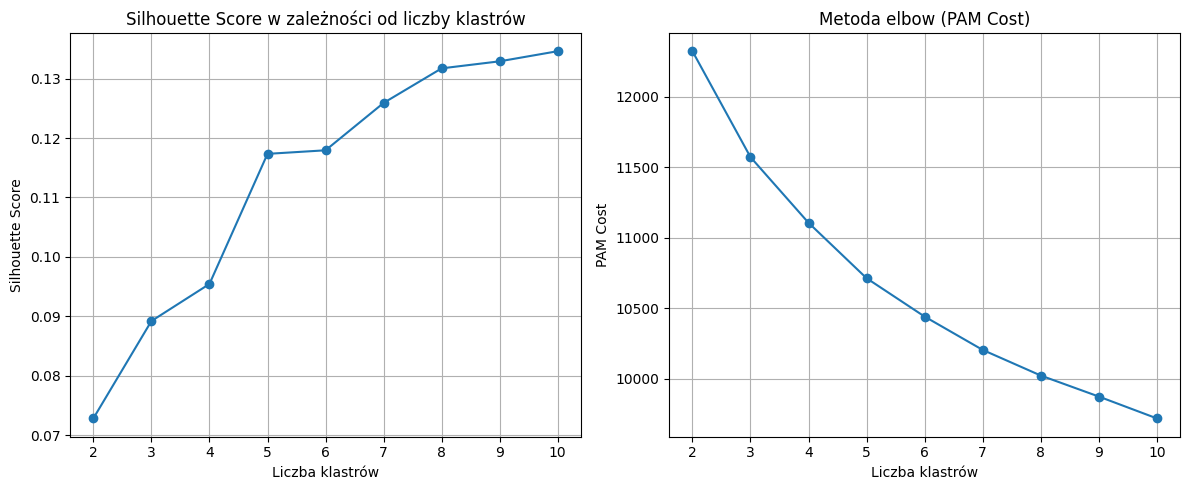

Optymalna liczba klastrów (na podstawie Silhouette Score): 10


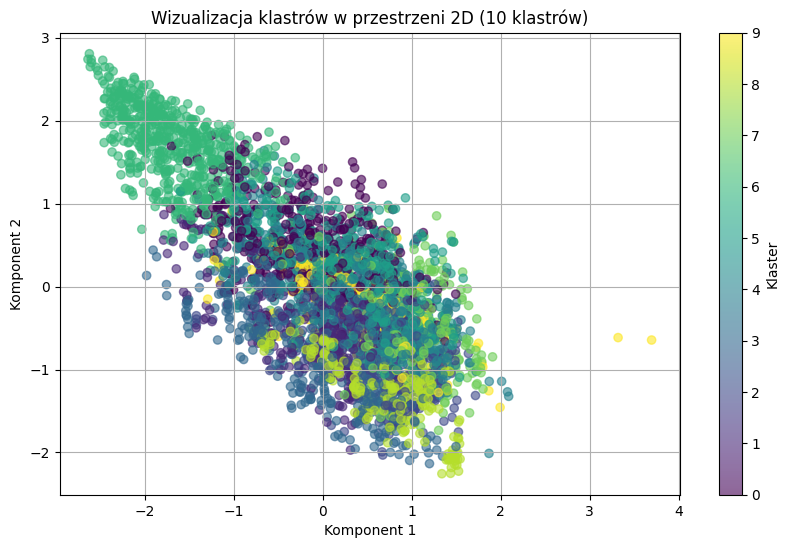

In [ ]:
#K-Medoids i dostrajanie hiperparametrów - metoda Elbow i PAM Cost (elbow)
#PCA10

file_path = 'C:\\Users\\oliwi\\OneDrive\\Pulpit\\ML_laboratorium\\modele\\train_pca10.csv'  # Zastąp nazwą swojego pliku CSV z danymi treningowymi
try:
    X = load_and_preprocess_csv(file_path)
except Exception as e:
    print(f"Błąd: {e}")
    exit()

# Normalizacja danych 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dostrajanie liczby klastrów
optimal_n_clusters = evaluate_kmedoids(X_scaled, max_clusters=10)
print(f"Optymalna liczba klastrów (na podstawie Silhouette Score): {optimal_n_clusters}")

# Trenowanie modelu K-Medoids z optymalną liczbą klastrów
kmedoids = KMedoids(n_clusters=optimal_n_clusters, random_state=42, method='pam')
labels = kmedoids.fit_predict(X_scaled)

# Wizualizacja: Rozkład klastrów w przestrzeni 2D
# Używamy pierwszych dwóch kolumn danych (zakładamy, że to główne komponenty PCA)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Klaster')
plt.title(f'Wizualizacja klastrów w przestrzeni 2D ({optimal_n_clusters} klastrów)')
plt.xlabel('Komponent 1')
plt.ylabel('Komponent 2')
plt.grid(True)
plt.show()

Wczytano dane z C:\Users\oliwi\OneDrive\Pulpit\ML_laboratorium\modele\train_pca100.csv: 3824 wierszy, 101 cech.
eps=2.00, min_samples=3, Silhouette Score=0.0575, Liczba klastrów=1
eps=2.50, min_samples=3, Silhouette Score=0.0575, Liczba klastrów=1
eps=3.00, min_samples=3, Silhouette Score=-0.2255, Liczba klastrów=15
eps=3.00, min_samples=4, Silhouette Score=-0.2176, Liczba klastrów=5
eps=3.00, min_samples=5, Silhouette Score=-0.2148, Liczba klastrów=2
eps=3.50, min_samples=3, Silhouette Score=-0.2161, Liczba klastrów=39
eps=3.50, min_samples=4, Silhouette Score=-0.2187, Liczba klastrów=14
eps=3.50, min_samples=5, Silhouette Score=-0.2039, Liczba klastrów=4
eps=3.50, min_samples=6, Silhouette Score=-0.1952, Liczba klastrów=3
eps=3.50, min_samples=7, Silhouette Score=-0.2125, Liczba klastrów=2
eps=3.50, min_samples=8, Silhouette Score=-0.2019, Liczba klastrów=1
eps=4.00, min_samples=3, Silhouette Score=-0.1978, Liczba klastrów=77
eps=4.00, min_samples=4, Silhouette Score=-0.1954, Liczba 

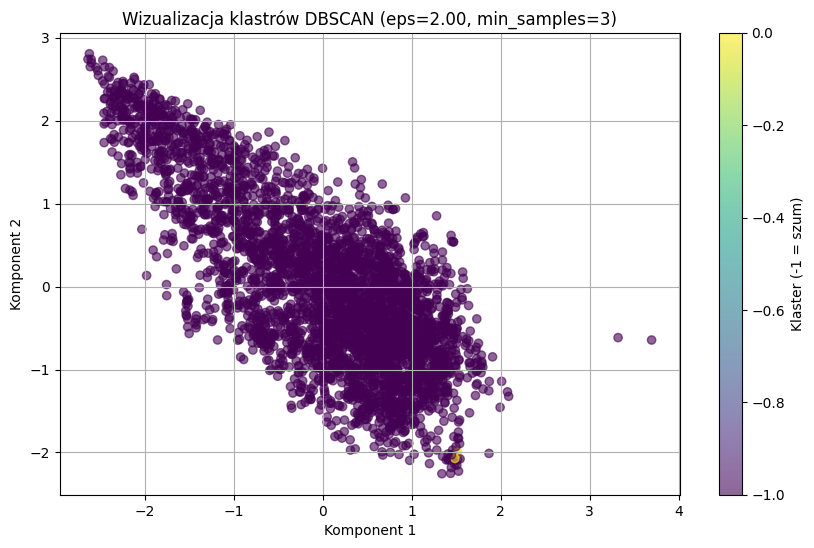

In [ ]:
#DBSCAN, hiperparametry: eps (maksymalna odległość między punktami w klastrze) i min_samples (minimalna liczba punktów w klastrze).
#PCA100
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Wczytanie danych treningowych z pliku CSV
file_path = 'C:\\Users\\oliwi\\OneDrive\\Pulpit\\ML_laboratorium\\modele\\train_pca100.csv'
try:
    X = load_and_preprocess_csv(file_path)
except Exception as e:
    print(f"Błąd: {e}")
    exit()

# Normalizacja danych 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Funkcja do dostrajania DBSCAN
def evaluate_dbscan(X, eps_range=np.arange(0.5, 5.0, 0.5), min_samples_range=range(3, 10)):
    best_eps = None
    best_min_samples = None
    best_silhouette = -1
    best_labels = None
    silhouette_scores = []
    
    for eps in eps_range:
        for min_samples in min_samples_range:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(X)
            # Sprawdzamy, czy jest więcej niż jeden klaster i mniej klastrów niż punktów
            if len(set(labels)) > 1 and len(set(labels)) < len(X):
                silhouette = silhouette_score(X, labels)
                silhouette_scores.append((eps, min_samples, silhouette))
                print(f"eps={eps:.2f}, min_samples={min_samples}, Silhouette Score={silhouette:.4f}, Liczba klastrów={len(set(labels)) - (1 if -1 in labels else 0)}")
                if silhouette > best_silhouette:
                    best_silhouette = silhouette
                    best_eps = eps
                    best_min_samples = min_samples
                    best_labels = labels
    
    if best_labels is None:
        print("Nie znaleziono odpowiednich parametrów dla DBSCAN!")
        exit()
    
    print(f"Najlepsze parametry: eps={best_eps:.2f}, min_samples={best_min_samples}, Silhouette Score={best_silhouette:.4f}")
    return best_labels, best_eps, best_min_samples

# Dostrajanie DBSCAN
best_labels, best_eps, best_min_samples = evaluate_dbscan(X_scaled)

# Wizualizacja klastrów w przestrzeni 2D
# Używamy pierwszych dwóch kolumn danych (zakładamy, że to główne komponenty PCA)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=best_labels, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Klaster (-1 = szum)')
plt.title(f'Wizualizacja klastrów DBSCAN (eps={best_eps:.2f}, min_samples={best_min_samples})')
plt.xlabel('Komponent 1')
plt.ylabel('Komponent 2')
plt.grid(True)
plt.show()


Wczytano dane z C:\Users\oliwi\OneDrive\Pulpit\ML_laboratorium\modele\train_pca10.csv: 3824 wierszy, 11 cech.
eps=0.50, min_samples=3, Silhouette Score=-0.3976, Liczba klastrów=45
eps=0.50, min_samples=4, Silhouette Score=-0.2527, Liczba klastrów=11
eps=0.50, min_samples=5, Silhouette Score=-0.0271, Liczba klastrów=4
eps=0.50, min_samples=6, Silhouette Score=0.0208, Liczba klastrów=2
eps=0.50, min_samples=7, Silhouette Score=0.0469, Liczba klastrów=1
eps=0.50, min_samples=8, Silhouette Score=0.0469, Liczba klastrów=1
eps=0.50, min_samples=9, Silhouette Score=0.0431, Liczba klastrów=1
eps=1.00, min_samples=3, Silhouette Score=-0.0596, Liczba klastrów=331
eps=1.00, min_samples=4, Silhouette Score=-0.1597, Liczba klastrów=194
eps=1.00, min_samples=5, Silhouette Score=-0.2214, Liczba klastrów=122
eps=1.00, min_samples=6, Silhouette Score=-0.2643, Liczba klastrów=74
eps=1.00, min_samples=7, Silhouette Score=-0.2734, Liczba klastrów=47
eps=1.00, min_samples=8, Silhouette Score=-0.2751, Liczb

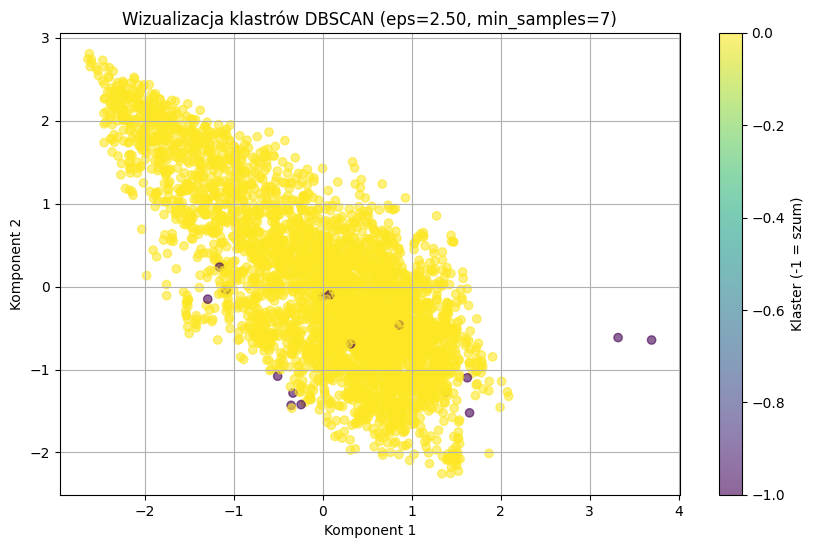

In [12]:
#DBSCAN, hiperparametry: eps (maksymalna odległość między punktami w klastrze) i min_samples (minimalna liczba punktów w klastrze).
#PCA10
# Wczytanie danych treningowych z pliku CSV
file_path = 'C:\\Users\\oliwi\\OneDrive\\Pulpit\\ML_laboratorium\\modele\\train_pca10.csv'
try:
    X = load_and_preprocess_csv(file_path)
except Exception as e:
    print(f"Błąd: {e}")
    exit()

# Normalizacja danych 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dostrajanie DBSCAN
best_labels, best_eps, best_min_samples = evaluate_dbscan(X_scaled)

# Wizualizacja klastrów w przestrzeni 2D
# Używamy pierwszych dwóch kolumn danych (zakładamy, że to główne komponenty PCA)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=best_labels, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Klaster (-1 = szum)')
plt.title(f'Wizualizacja klastrów DBSCAN (eps={best_eps:.2f}, min_samples={best_min_samples})')
plt.xlabel('Komponent 1')
plt.ylabel('Komponent 2')
plt.grid(True)
plt.show()


Hierarchia: Pozwala zobaczyć, jak punkty grupują się na różnych poziomach, co jest przydatne, gdy klastry są niejasne.
Działa z PCA: Dane po PCA są już zredukowane, co zmniejsza szum i ułatwia algorytmowi znajdowanie struktur.

Wczytano dane z C:\Users\oliwi\OneDrive\Pulpit\ML_laboratorium\modele\train_pca100.csv: 3824 wierszy, 101 cech.
Silhouette Score dla 2 klastrów: -0.0811
Silhouette Score dla 3 klastrów: -0.0788
Silhouette Score dla 4 klastrów: -0.0742
Silhouette Score dla 5 klastrów: -0.0716
Silhouette Score dla 6 klastrów: -0.0684
Silhouette Score dla 7 klastrów: -0.0669
Silhouette Score dla 8 klastrów: -0.0641
Silhouette Score dla 9 klastrów: -0.0616
Silhouette Score dla 10 klastrów: -0.0590


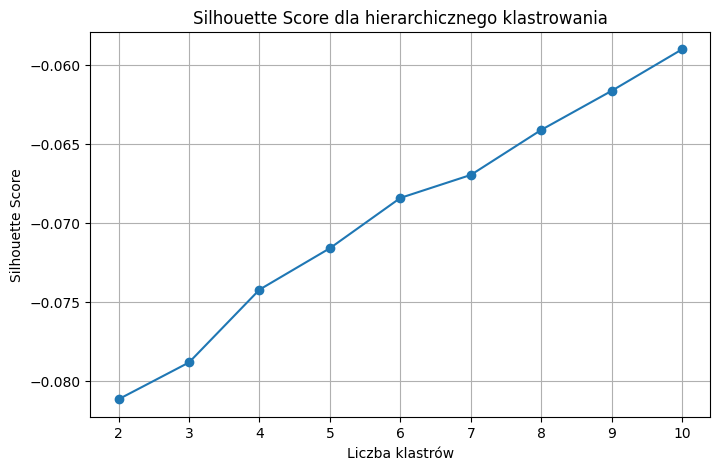

Optymalna liczba klastrów (na podstawie Silhouette Score): 10


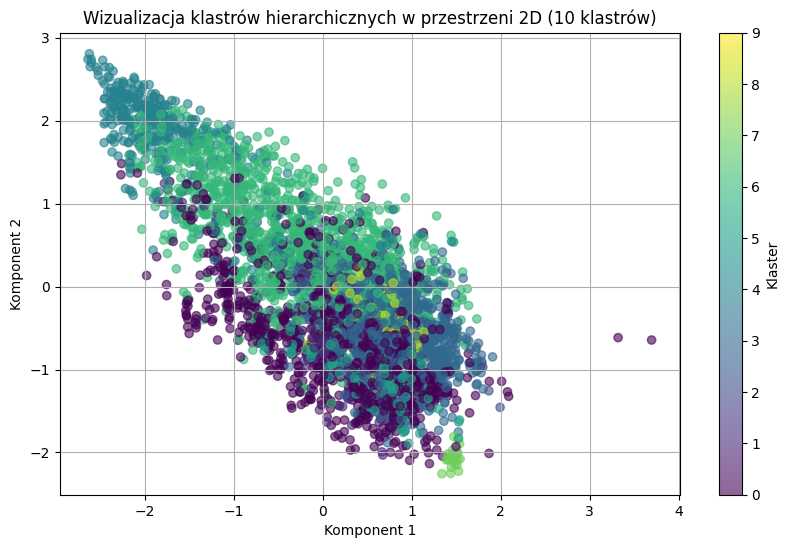

In [2]:
#Hierarchiczne klastrowanie, Shilhouette Score 
#PCA100
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Wczytanie danych treningowych z pliku CSV
file_path = 'C:\\Users\\oliwi\\OneDrive\\Pulpit\\ML_laboratorium\\modele\\train_pca100.csv'
try:
    X = load_and_preprocess_csv(file_path)
except Exception as e:
    print(f"Błąd: {e}")
    exit()

# Normalizacja danych 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Funkcja do dostrajania liczby klastrów
def evaluate_hierarchical(X, max_clusters=10):
    silhouette_scores = []
    cluster_range = range(2, max_clusters + 1)
    
    for n_clusters in cluster_range:
        hierarchical = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
        labels = hierarchical.fit_predict(X)
        silhouette_avg = silhouette_score(X, labels)
        silhouette_scores.append(silhouette_avg)
        print(f"Silhouette Score dla {n_clusters} klastrów: {silhouette_avg:.4f}")
    
    # Wizualizacja Silhouette Score
    plt.figure(figsize=(8, 5))
    plt.plot(cluster_range, silhouette_scores, marker='o')
    plt.title('Silhouette Score dla hierarchicznego klastrowania')
    plt.xlabel('Liczba klastrów')
    plt.ylabel('Silhouette Score')
    plt.grid(True)
    plt.show()
    
    # Zwracamy optymalną liczbę klastrów
    optimal_clusters = cluster_range[np.argmax(silhouette_scores)]
    return optimal_clusters

# Dostrajanie liczby klastrów
optimal_n_clusters = evaluate_hierarchical(X_scaled, max_clusters=10)
print(f"Optymalna liczba klastrów (na podstawie Silhouette Score): {optimal_n_clusters}")

# Trenowanie modelu hierarchicznego z optymalną liczbą klastrów
hierarchical = AgglomerativeClustering(n_clusters=optimal_n_clusters, linkage='ward')
labels = hierarchical.fit_predict(X_scaled)

# Wizualizacja klastrów w przestrzeni 2D
# Używamy pierwszych dwóch kolumn danych (zakładamy, że to główne komponenty PCA)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Klaster')
plt.title(f'Wizualizacja klastrów hierarchicznych w przestrzeni 2D ({optimal_n_clusters} klastrów)')
plt.xlabel('Komponent 1')
plt.ylabel('Komponent 2')
plt.grid(True)
plt.show()



Wczytano dane z C:\Users\oliwi\OneDrive\Pulpit\ML_laboratorium\modele\train_pca10.csv: 3824 wierszy, 11 cech.
Silhouette Score dla 2 klastrów: 0.0931
Silhouette Score dla 3 klastrów: 0.1049
Silhouette Score dla 4 klastrów: 0.1096
Silhouette Score dla 5 klastrów: 0.1066
Silhouette Score dla 6 klastrów: 0.1126
Silhouette Score dla 7 klastrów: 0.0902
Silhouette Score dla 8 klastrów: 0.0955
Silhouette Score dla 9 klastrów: 0.1002
Silhouette Score dla 10 klastrów: 0.1066


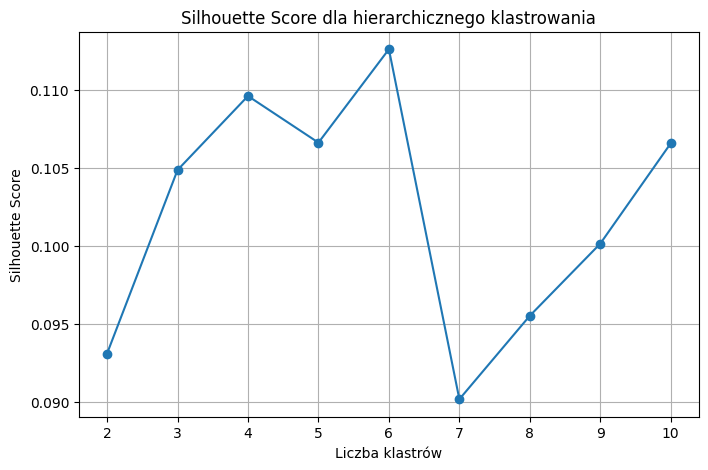

Optymalna liczba klastrów (na podstawie Silhouette Score): 6


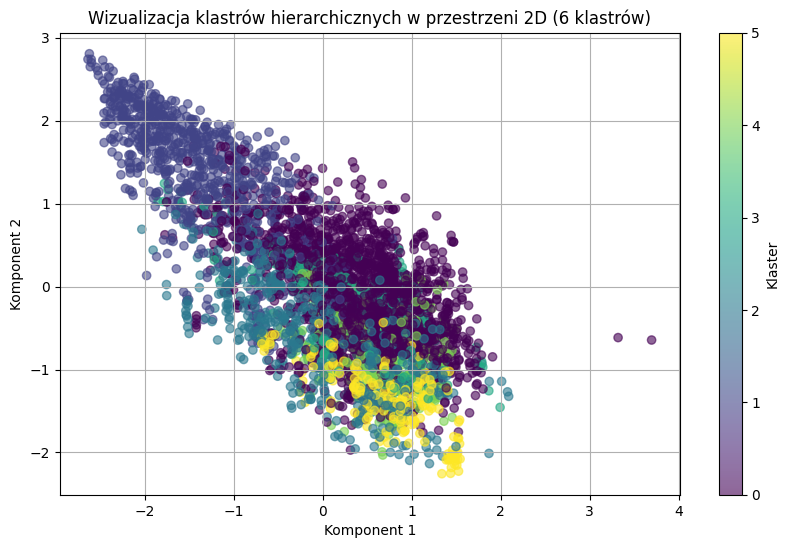

In [8]:
#Hierarchiczne klastrowanie, Shilhouette Score 
#PCA10

# Wczytanie danych treningowych z pliku CSV
file_path = 'C:\\Users\\oliwi\\OneDrive\\Pulpit\\ML_laboratorium\\modele\\train_pca10.csv'
try:
    X = load_and_preprocess_csv(file_path)
except Exception as e:
    print(f"Błąd: {e}")
    exit()

# Normalizacja danych 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dostrajanie liczby klastrów
optimal_n_clusters = evaluate_hierarchical(X_scaled, max_clusters=10)
print(f"Optymalna liczba klastrów (na podstawie Silhouette Score): {optimal_n_clusters}")

# Trenowanie modelu hierarchicznego z optymalną liczbą klastrów
hierarchical = AgglomerativeClustering(n_clusters=optimal_n_clusters, linkage='ward')
labels = hierarchical.fit_predict(X_scaled)

# Wizualizacja klastrów w przestrzeni 2D
# Używamy pierwszych dwóch kolumn danych (zakładamy, że to główne komponenty PCA)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Klaster')
plt.title(f'Wizualizacja klastrów hierarchicznych w przestrzeni 2D ({optimal_n_clusters} klastrów)')
plt.xlabel('Komponent 1')
plt.ylabel('Komponent 2')
plt.grid(True)
plt.show()

#CHYBA NAJLEPSZE JAK DO TEJ PORY (6 klastwo poodzielanych - 6 gatunkow meduz)

In [ ]:
#pip install hdbscan

HDBSCAN jest rozszerzeniem DBSCAN, które nie wymaga określania liczby klastrów i dobrze radzi sobie z danymi o różnej gęstości.
Może oznaczyć punkty w mniej gęstych regionach jako szum (-1), co jest przydatne, jeśli większość danych tworzy jedno skupisko, ale istnieją subtelne gęstsze podgrupy.
Elastyczne podejście hierarchiczne pozwala wykryć klastry o nieregularnych kształtach.

min_cluster_size: Określa minimalny rozmiar klastra (np. 5–20, w zależności od liczby punktów).
min_samples: Kontroluje konserwatyzm w oznaczaniu szumu (np. 5–10).

Wczytano dane z C:\Users\oliwi\OneDrive\Pulpit\ML_laboratorium\modele\train_pca100.csv: 3824 wierszy, 101 cech.


C:\Users\oliwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\oliwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Liczba klastrów: 157
Silhouette Score: 0.0215


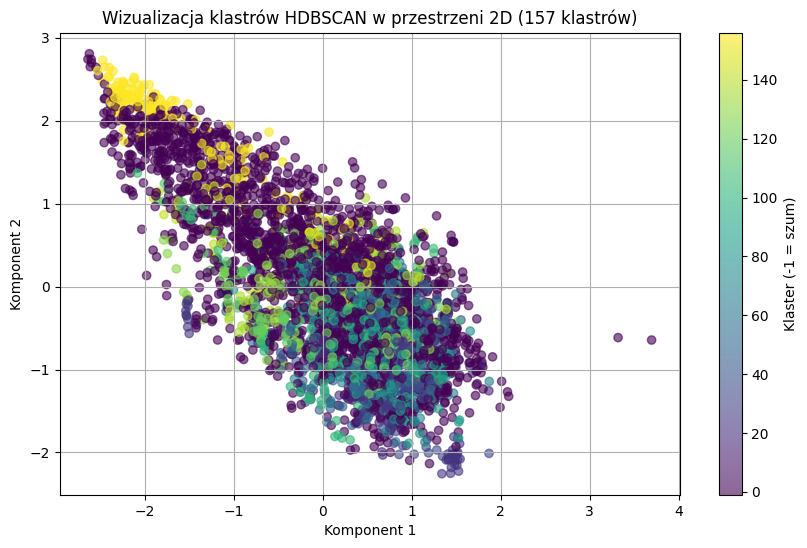

In [15]:
#HDBSCAN
#PCA100
import pandas as pd
import numpy as np
import hdbscan
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Wczytanie danych treningowych z pliku CSV
file_path = 'C:\\Users\\oliwi\\OneDrive\\Pulpit\\ML_laboratorium\\modele\\train_pca100.csv'
try:
    X = load_and_preprocess_csv(file_path)
except Exception as e:
    print(f"Błąd: {e}")
    exit()

# Normalizacja danych (pomiń, jeśli dane są już znormalizowane)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Klastrowanie za pomocą HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=5)
labels = clusterer.fit_predict(X_scaled)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Odejmujemy szum (-1)
print(f"Liczba klastrów: {n_clusters}")
if n_clusters > 1:
    silhouette_avg = silhouette_score(X_scaled, labels)
    print(f"Silhouette Score: {silhouette_avg:.4f}")
else:
    print("Za mało klastrów do obliczenia Silhouette Score.")

# Wizualizacja klastrów w przestrzeni 2D
# Używamy pierwszych dwóch kolumn danych (zakładamy, że to główne komponenty PCA)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Klaster (-1 = szum)')
plt.title(f'Wizualizacja klastrów HDBSCAN w przestrzeni 2D ({n_clusters} klastrów)')
plt.xlabel('Komponent 1')
plt.ylabel('Komponent 2')
plt.grid(True)
plt.show()


Wczytano dane z C:\Users\oliwi\OneDrive\Pulpit\ML_laboratorium\modele\train_pca10.csv: 3824 wierszy, 11 cech.


C:\Users\oliwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\oliwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Liczba klastrów: 116
Silhouette Score: -0.1428


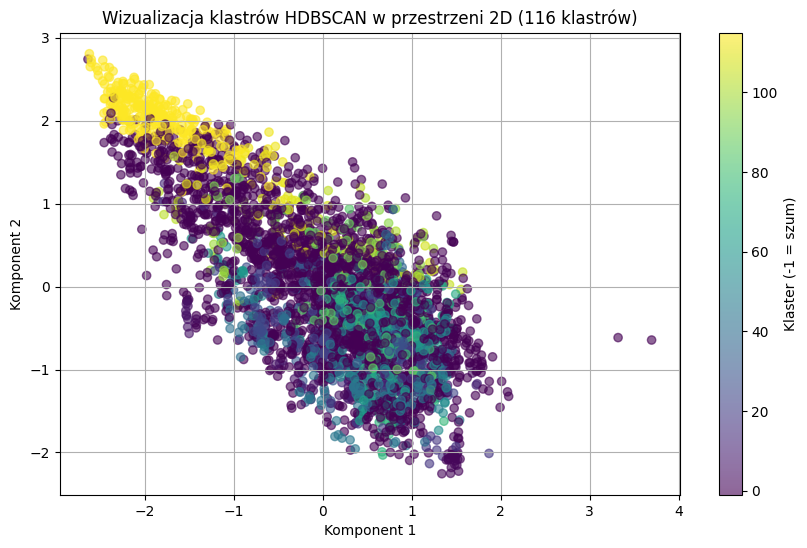

In [ ]:
#HDBSCAN
#PCA10
import pandas as pd
import numpy as np
import hdbscan
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Wczytanie danych treningowych z pliku CSV
file_path = 'C:\\Users\\oliwi\\OneDrive\\Pulpit\\ML_laboratorium\\modele\\train_pca10.csv'
try:
    X = load_and_preprocess_csv(file_path)
except Exception as e:
    print(f"Błąd: {e}")
    exit()

# Normalizacja danych (pomiń, jeśli dane są już znormalizowane)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Klastrowanie za pomocą HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=5)
labels = clusterer.fit_predict(X_scaled)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Odejmujemy szum (-1)
print(f"Liczba klastrów: {n_clusters}")
if n_clusters > 1:
    silhouette_avg = silhouette_score(X_scaled, labels)
    print(f"Silhouette Score: {silhouette_avg:.4f}")
else:
    print("Za mało klastrów do obliczenia Silhouette Score.")

# Wizualizacja klastrów w przestrzeni 2D
# Używamy pierwszych dwóch kolumn danych (zakładamy, że to główne komponenty PCA)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Klaster (-1 = szum)')
plt.title(f'Wizualizacja klastrów HDBSCAN w przestrzeni 2D ({n_clusters} klastrów)')
plt.xlabel('Komponent 1')
plt.ylabel('Komponent 2')
plt.grid(True)
plt.show()


Spectral Clustering dobrze radzi sobie z klastrami o nieregularnych kształtach i może wykryć subtelne struktury w danych, nawet jeśli punkty są w jednym skupisku.
Wykorzystuje graf podobieństwa, co pozwala modelować złożone relacje między punktami.
Skuteczny dla danych po PCA, gdzie wariancja jest skoncentrowana.

n_clusters: Liczba klastrów (dostrajana za pomocą Silhouette Score).
affinity: nearest_neighbors lub rbf (gaussowskie jądro).
n_neighbors: Liczba sąsiadów w nearest_neighbors (np. 10–50).


Wczytano dane: 3824 wierszy, 101 cech.


C:\Users\oliwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Silhouette Score dla 2 klastrów: 0.0626


C:\Users\oliwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Silhouette Score dla 3 klastrów: 0.0453


C:\Users\oliwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Silhouette Score dla 4 klastrów: 0.0469


C:\Users\oliwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Silhouette Score dla 5 klastrów: 0.0152


C:\Users\oliwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Silhouette Score dla 6 klastrów: 0.0177


C:\Users\oliwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Silhouette Score dla 7 klastrów: 0.0146


C:\Users\oliwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Silhouette Score dla 8 klastrów: 0.0164


C:\Users\oliwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Silhouette Score dla 9 klastrów: 0.0024


C:\Users\oliwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Silhouette Score dla 10 klastrów: 0.0042
Optymalna liczba klastrów: 2


C:\Users\oliwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


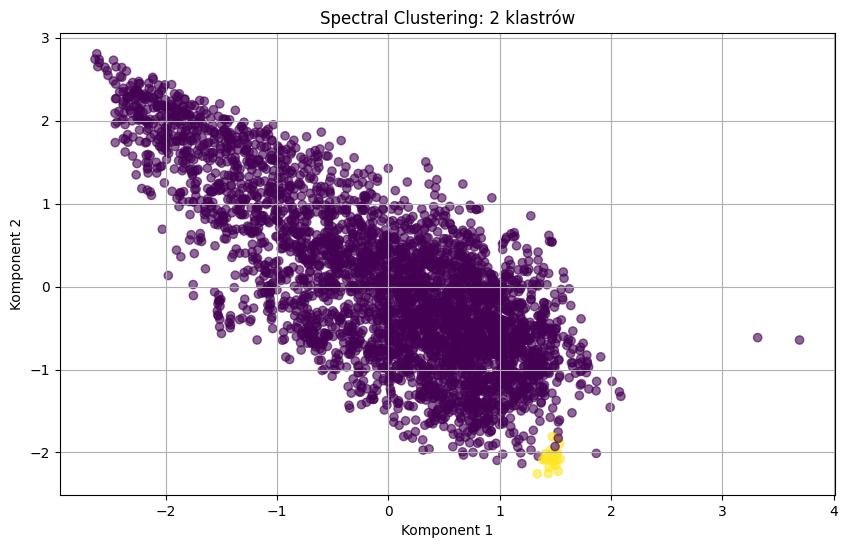

In [21]:
#Spectral Clustering
#PCA100
import pandas as pd
import numpy as np
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

file_path = 'C:\\Users\\oliwi\\OneDrive\\Pulpit\\ML_laboratorium\\modele\\train_pca100.csv'
X = load_and_preprocess_csv(file_path)

# Normalizacja
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dostrajanie liczby klastrów
def evaluate_spectral(X, max_clusters=10):
    silhouette_scores = []
    for n_clusters in range(2, max_clusters + 1):
        spectral = SpectralClustering(n_clusters=n_clusters, random_state=42, affinity='nearest_neighbors', n_neighbors=20)
        labels = spectral.fit_predict(X)
        silhouette_avg = silhouette_score(X, labels)
        silhouette_scores.append(silhouette_avg)
        print(f"Silhouette Score dla {n_clusters} klastrów: {silhouette_avg:.4f}")
    optimal_clusters = np.argmax(silhouette_scores) + 2
    return optimal_clusters, silhouette_scores

optimal_n_clusters, silhouette_scores = evaluate_spectral(X_scaled)
print(f"Optymalna liczba klastrów: {optimal_n_clusters}")

# Trenowanie modelu
spectral = SpectralClustering(n_clusters=optimal_n_clusters, random_state=42, affinity='nearest_neighbors', n_neighbors=20)
labels = spectral.fit_predict(X_scaled)

# Wizualizacja
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.title(f'Spectral Clustering: {optimal_n_clusters} klastrów')
plt.xlabel('Komponent 1')
plt.ylabel('Komponent 2')
plt.grid(True)
plt.show()


GMM zakłada, że dane pochodzą z mieszanki rozkładów normalnych, co pozwala modelować klastry o różnych kształtach i rozmiarach.
Może uchwycić subtelne różnice w gęstości, nawet w jednym skupisku.
Przydatny dla danych ciągłych bez wyraźnych granic.

n_components: Liczba klastrów (można dostroić za pomocą BIC/AIC lub Silhouette Score).
covariance_type: Typ macierzy kowariancji (np. full, tied).

Wczytano dane z C:\Users\oliwi\OneDrive\Pulpit\ML_laboratorium\modele\train_pca100.csv: 3824 wierszy, 101 cech.
Silhouette Score dla 2 klastrów: 0.0098
Silhouette Score dla 3 klastrów: 0.0103
Silhouette Score dla 4 klastrów: -0.0088
Silhouette Score dla 5 klastrów: -0.0115
Silhouette Score dla 6 klastrów: -0.0279
Silhouette Score dla 7 klastrów: -0.0226
Silhouette Score dla 8 klastrów: -0.0136
Silhouette Score dla 9 klastrów: -0.0263
Silhouette Score dla 10 klastrów: -0.0320
Optymalna liczba klastrów: 3


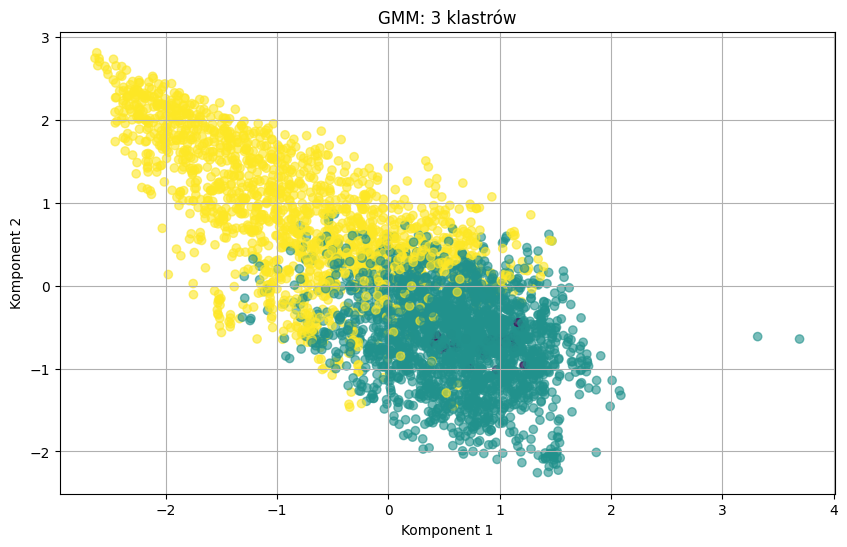

In [11]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

file_path = 'C:\\Users\\oliwi\\OneDrive\\Pulpit\\ML_laboratorium\\modele\\train_pca100.csv'
X = load_and_preprocess_csv(file_path)

# Normalizacja
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dostrajanie liczby klastrów
def evaluate_gmm(X, max_clusters=10):
    silhouette_scores = []
    for n_clusters in range(2, max_clusters + 1):
        gmm = GaussianMixture(n_components=n_clusters, random_state=42, covariance_type='full')
        labels = gmm.fit_predict(X)
        silhouette_avg = silhouette_score(X, labels)
        silhouette_scores.append(silhouette_avg)
        print(f"Silhouette Score dla {n_clusters} klastrów: {silhouette_avg:.4f}")
    optimal_clusters = np.argmax(silhouette_scores) + 2
    return optimal_clusters, silhouette_scores

optimal_n_clusters, silhouette_scores = evaluate_gmm(X_scaled)
print(f"Optymalna liczba klastrów: {optimal_n_clusters}")

# Trenowanie modelu
gmm = GaussianMixture(n_components=optimal_n_clusters, random_state=42, covariance_type='full')
labels = gmm.fit_predict(X_scaled)

# Wizualizacja
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.title(f'GMM: {optimal_n_clusters} klastrów')
plt.xlabel('Komponent 1')
plt.ylabel('Komponent 2')
plt.grid(True)
plt.show()



Wczytano dane z C:\Users\oliwi\OneDrive\Pulpit\ML_laboratorium\modele\train_pca10.csv: 3824 wierszy, 11 cech.
Silhouette Score dla 2 klastrów: 0.0780
Silhouette Score dla 3 klastrów: 0.0873
Silhouette Score dla 4 klastrów: 0.0760
Silhouette Score dla 5 klastrów: 0.0765
Silhouette Score dla 6 klastrów: 0.1077
Silhouette Score dla 7 klastrów: 0.0940
Silhouette Score dla 8 klastrów: 0.1004
Silhouette Score dla 9 klastrów: 0.0912
Silhouette Score dla 10 klastrów: 0.0877
Optymalna liczba klastrów: 6


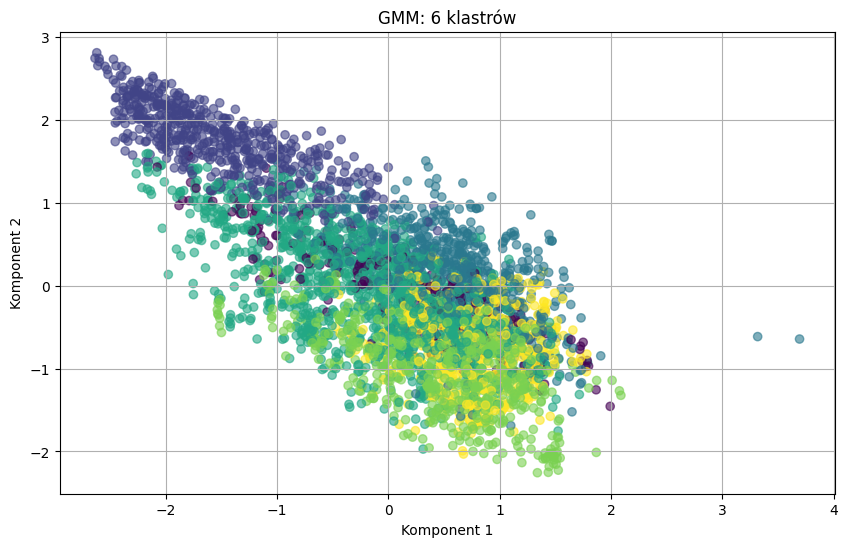

In [12]:

file_path = 'C:\\Users\\oliwi\\OneDrive\\Pulpit\\ML_laboratorium\\modele\\train_pca10.csv'
X = load_and_preprocess_csv(file_path)

# Normalizacja
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

optimal_n_clusters, silhouette_scores = evaluate_gmm(X_scaled)
print(f"Optymalna liczba klastrów: {optimal_n_clusters}")

# Trenowanie modelu
gmm = GaussianMixture(n_components=optimal_n_clusters, random_state=42, covariance_type='full')
labels = gmm.fit_predict(X_scaled)

# Wizualizacja
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.title(f'GMM: {optimal_n_clusters} klastrów')
plt.xlabel('Komponent 1')
plt.ylabel('Komponent 2')
plt.grid(True)
plt.show()

#Ladnie podzielone (6 klastrow a mielismy 6 gatunkow meduz)

Wybrane Modele:
1. Hierarchiczne klastrowanie dla Pca 10 - Silhouette Score dla 6 klastrów: 0.1126
2. GMM Gaussian Mixture Models dla Pca 10 - Silhouette Score dla 6 klastrów: 0.1077
3. K-Means dla Pca 10 - Silhouette Score dla 9 klastrów: 0.1509

Mimo że model K-Means uzyskał najwyższy silhouette score (0.1509), zdecydowano się na wybór modelu hierarchicznego z 6 klastrami, który osiągnął silhouette score 0.1126. Powodem tej decyzji była większa spójność klastrów widoczna w przestrzeniach redukcji wymiarów (PCA, UMAP, t-SNE), lepsza interpretowalność struktury danych, a także stabilność wyników modelu. Chcieliśmy tez z ciekawości porównać czy klastry odpowiadają gatunkom (6).

Optymalna liczba klastrów: 6


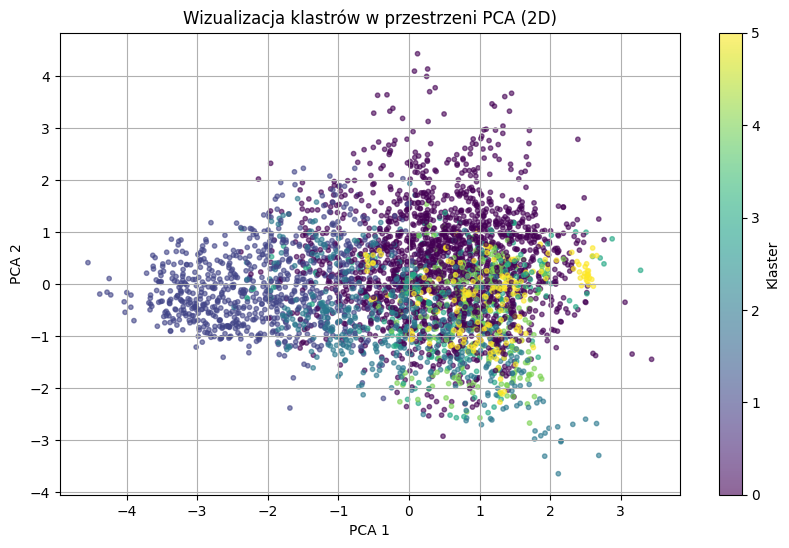

C:\Users\oliwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\oliwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


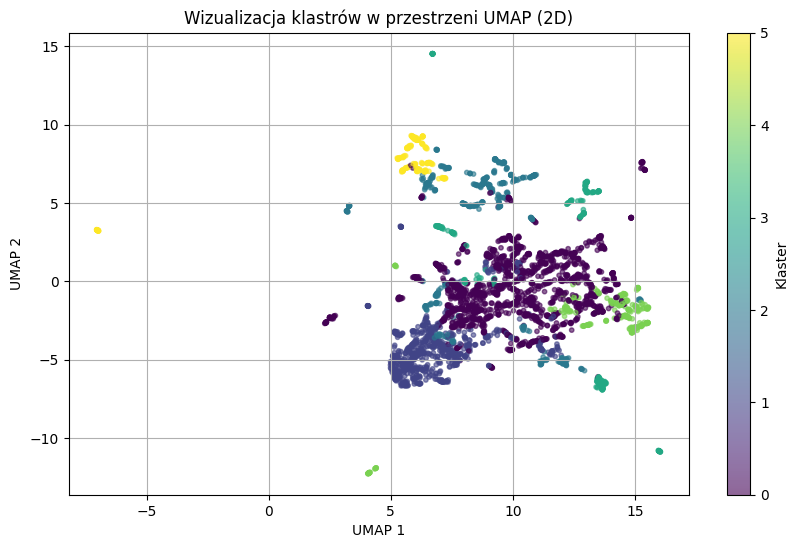

C:\Users\oliwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


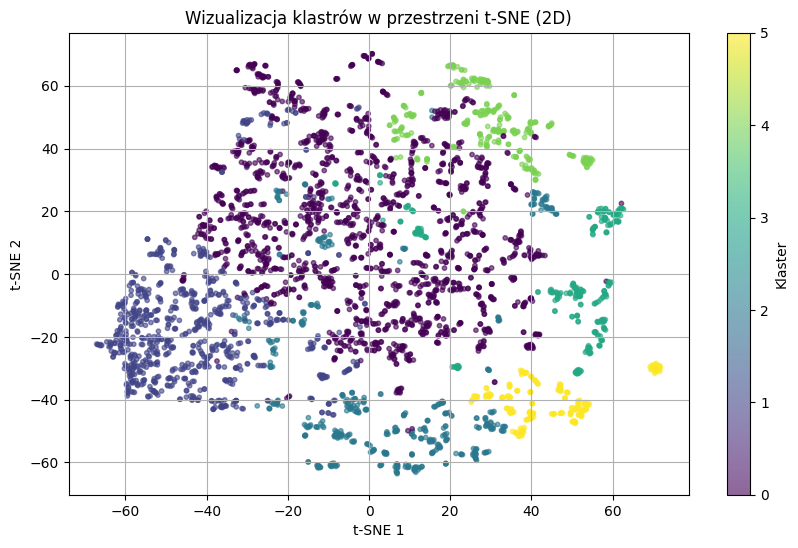

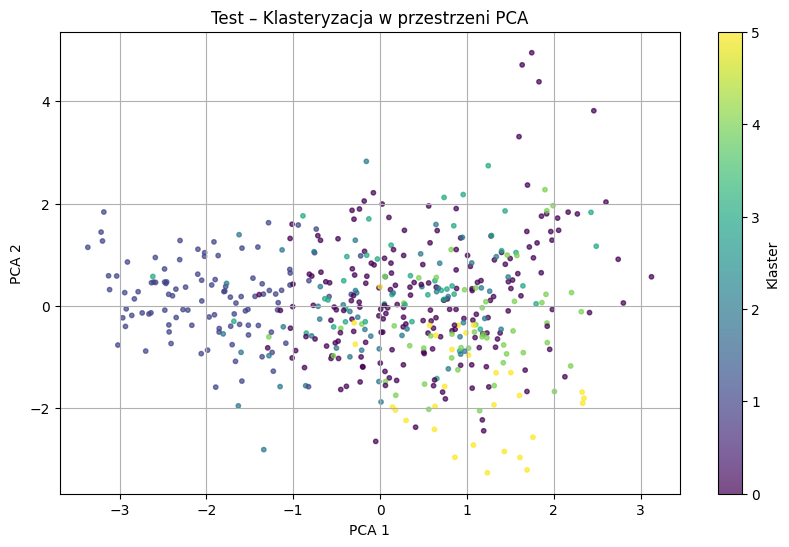

C:\Users\oliwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\oliwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


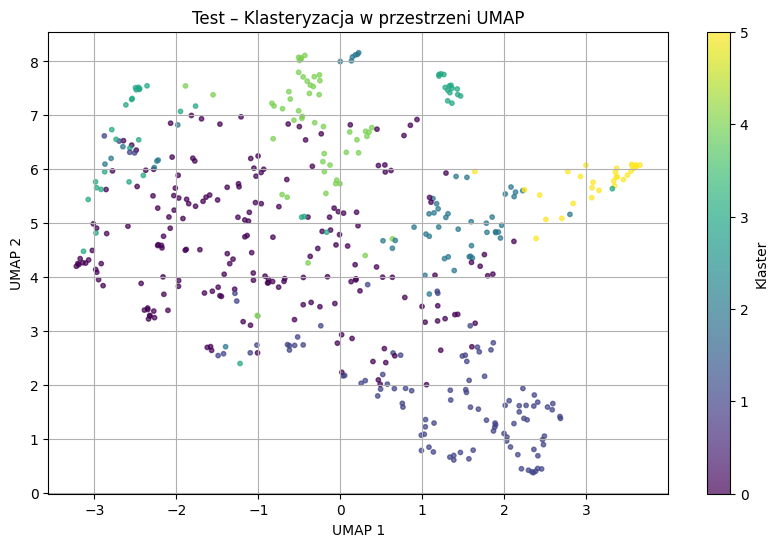

C:\Users\oliwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


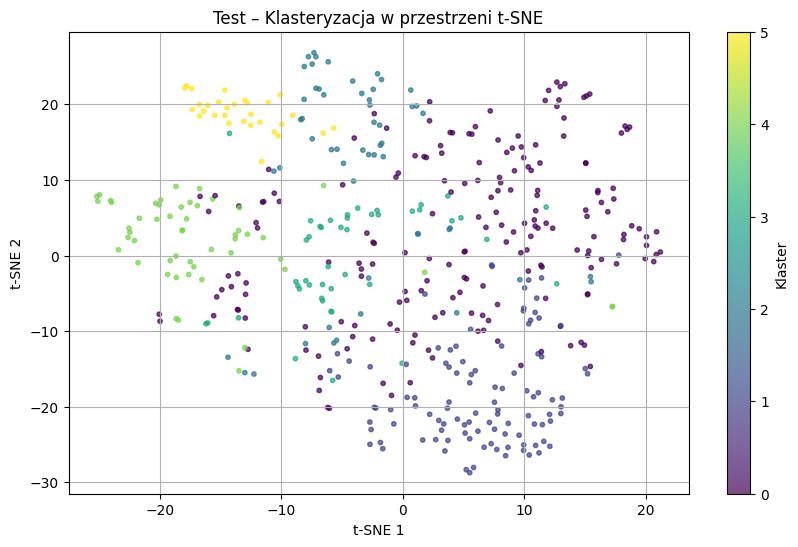

In [5]:
#Hierarchiczne klastrowanie, Shilhouette Score 
#PCA10
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score

# --- Funkcja do wczytywania i przetwarzania CSV (dopasuj do swoich danych) ---
def load_and_preprocess_csv(file_path):
    import pandas as pd
    df = pd.read_csv(file_path)
    # Zakładam, że wszystkie kolumny to cechy
    return df.values

# --- Wczytanie i przygotowanie danych treningowych ---
file_path_train = 'C:\\Users\\oliwi\\OneDrive\\Pulpit\\ML_laboratorium\\modele\\train_pca10.csv'
try:
    X_train = load_and_preprocess_csv(file_path_train)
except Exception as e:
    print(f"Błąd wczytania danych treningowych: {e}")
    exit()

# Normalizacja danych treningowych
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# --- Funkcja do wyboru optymalnej liczby klastrów na podstawie silhouette score ---
from sklearn.metrics import silhouette_score

def evaluate_hierarchical(X, max_clusters=10):
    best_score = -1
    best_n = 2
    for n_clusters in range(2, max_clusters + 1):
        model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
        labels = model.fit_predict(X)
        score = silhouette_score(X, labels)
        if score > best_score:
            best_score = score
            best_n = n_clusters
    return best_n

optimal_n_clusters = evaluate_hierarchical(X_train_scaled, max_clusters=10)
print(f"Optymalna liczba klastrów: {optimal_n_clusters}")

# Trenowanie modelu na danych treningowych
hierarchical = AgglomerativeClustering(n_clusters=optimal_n_clusters, linkage='ward')
train_labels = hierarchical.fit_predict(X_train_scaled)


# --- PCA ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=train_labels, s=10, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Klaster')
plt.title('Wizualizacja klastrów w przestrzeni PCA (2D)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()

# --- UMAP ---
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X_train_scaled)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=train_labels, s=10, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Klaster')
plt.title('Wizualizacja klastrów w przestrzeni UMAP (2D)')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(True)
plt.show()

# --- t-SNE ---
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_train_scaled)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=train_labels, s=10, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Klaster')
plt.title('Wizualizacja klastrów w przestrzeni t-SNE (2D)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.grid(True)
plt.show()

# Obliczenie centroidów klastrów na danych treningowych
centroids = np.array([X_train_scaled[train_labels == i].mean(axis=0) for i in range(optimal_n_clusters)])

# --- Wczytanie i przygotowanie danych testowych ---
file_path_test = 'C:\\Users\\oliwi\\OneDrive\\Pulpit\\ML_laboratorium\\modele\\test_pca10.csv'
try:
    X_test = load_and_preprocess_csv(file_path_test)
except Exception as e:
    print(f"Błąd wczytania danych testowych: {e}")
    exit()

# Normalizacja danych testowych (tego samego skalera)
X_test_scaled = scaler.transform(X_test)

# Przypisanie klastrów do danych testowych wg najbliższego centroidu
distances = cdist(X_test_scaled, centroids, metric='euclidean')
test_labels = np.argmin(distances, axis=1)


# PCA (test)
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test_scaled)
plt.figure(figsize=(10, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=test_labels, cmap='viridis', s=10, alpha=0.7)
plt.colorbar(label='Klaster')
plt.title('Test – Klasteryzacja w przestrzeni PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()

# UMAP (test)
reducer = umap.UMAP(n_components=2, random_state=42)
X_test_umap = reducer.fit_transform(X_test_scaled)
plt.figure(figsize=(10, 6))
plt.scatter(X_test_umap[:, 0], X_test_umap[:, 1], c=test_labels, cmap='viridis', s=10, alpha=0.7)
plt.colorbar(label='Klaster')
plt.title('Test – Klasteryzacja w przestrzeni UMAP')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(True)
plt.show()

# t-SNE (test)
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_test_tsne = tsne.fit_transform(X_test_scaled)
plt.figure(figsize=(10, 6))
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=test_labels, cmap='viridis', s=10, alpha=0.7)
plt.colorbar(label='Klaster')
plt.title('Test – Klasteryzacja w przestrzeni t-SNE')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.grid(True)
plt.show()

